In [2]:
import matplotlib.pyplot as plt
import numpy as np 
plt.rcParams['figure.figsize'] = [16,8]
plt.rcParams.update({'font.size': 12})

### First we create a gaussian cloud

In [3]:
xC = np.array([2,1])
sig= np.array([2,0.5])

theta = np.pi/3

R = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta),np.cos(theta)]]) #Rotation matrix

nPoints = 10000

X = R @ np.diag(sig) @ np.random.randn(2,nPoints) + np.diag(xC) @ np.ones((2,nPoints))


## GETTING TO KNOW THE DATA
print("SHAPE: X:", X.shape)

SHAPE: X: (2, 10000)


### Getting to know R (A  Rotational matrix)

In [46]:
R

array([[ 0.5      , -0.8660254],
       [ 0.8660254,  0.5      ]])

In [47]:
np.round(R@R.T)

array([[1., 0.],
       [0., 1.]])

In [48]:
np.linalg.det(R@R.T)

1.0

### Visualizting data

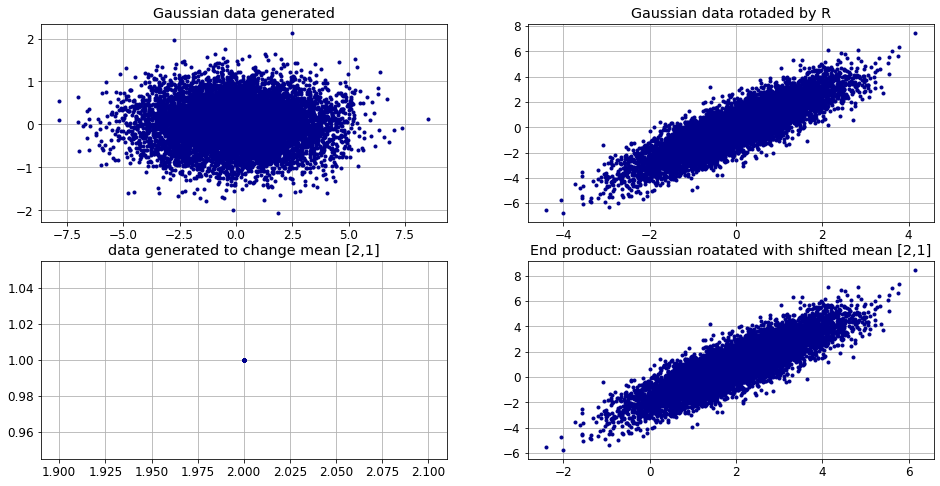

In [45]:
fig = plt.figure()

ax1 = fig.add_subplot(221)
x1 =np.diag(sig) @ np.random.randn(2,nPoints) 
ax1.plot(x1[0,:],x1[1,:], '.', Color='darkblue')
ax1.set_title("Gaussian data generated")
plt.grid()

ax2 = fig.add_subplot(222)
x2 = R@x1
ax2.plot(x2[0,:],x2[1,:], '.', Color='darkblue')
ax2.set_title("Gaussian data rotaded by R")
plt.grid()

ax3 = fig.add_subplot(223)
x3=np.diag(xC) @ np.ones((2,nPoints))
ax3.plot(x3[0,:],x3[1,:], '.', Color='darkblue')
ax3.set_title("data generated to change mean [2,1]")
plt.grid()

ax4 = fig.add_subplot(224)
x4=x2+x3
ax4.plot(x4[0,:],x4[1,:], '.', Color='darkblue')
ax4.set_title("End product: Gaussian roatated with shifted mean [2,1]")
plt.grid()

plt.show()

Now lets use PCA To analyze the data

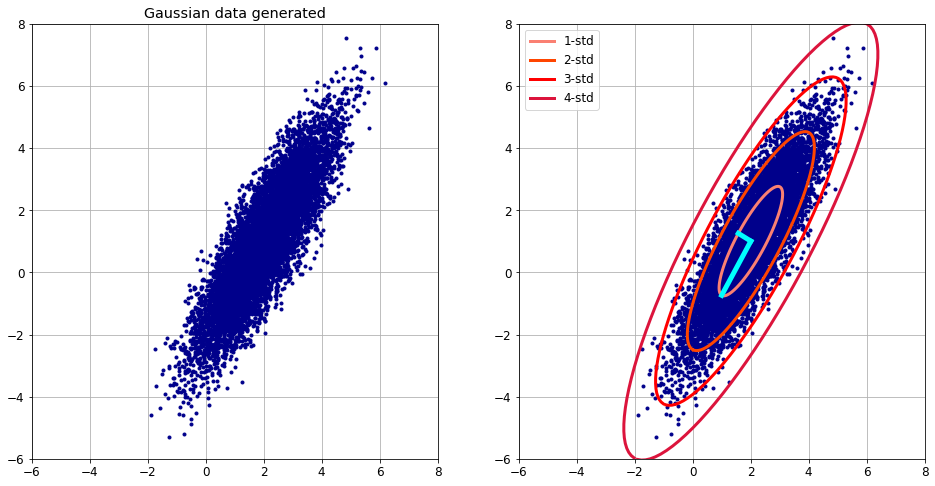

In [82]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(X[0,:],X[1,:], '.', Color='darkblue')
ax1.set_title("Gaussian data generated")
ax1.grid()
plt.xlim((-6, 8))
plt.ylim((-6,8))

## f_ch01_ex03_1b

Xavg = np.mean(X,axis=1)                  # Compute mean
B = X - np.tile(Xavg,(nPoints,1)).T       # Mean-subtracted data

# Find principal components (SVD)
U, S, VT = np.linalg.svd(B/np.sqrt(nPoints),full_matrices=0)

ax2 = fig.add_subplot(122)
ax2.plot(X[0,:],X[1,:], '.', Color='darkblue')   # Plot data to overlay PCA
ax2.grid()
plt.xlim((-6, 8))
plt.ylim((-6,8))

#we generate data from 0 to 2pi to feed a unitary circle
theta = 2 * np.pi * np.arange(0,1,0.01)

# We multiply US by a unitary circle in order to capture the bundaries
unitary_circle = np.array([np.cos(theta),np.sin(theta)])
Xstd = U @ np.diag(S) @ unitary_circle

# 1-std confidence interval
ax2.plot(Xavg[0] + Xstd[0,:], Xavg[1] + Xstd[1,:],'-',color='salmon',LineWidth=3,label="1-std")

# 2-std confidence interval
ax2.plot(Xavg[0] + 2*Xstd[0,:], Xavg[1] + 2*Xstd[1,:],'-',color='orangered',LineWidth=3,label="2-std")

# 3-std confidence interval
ax2.plot(Xavg[0] + 3*Xstd[0,:], Xavg[1] + 3*Xstd[1,:],'-',color='red',LineWidth=3,label="3-std")

# 4-std confidence interval
ax2.plot(Xavg[0] + 4*Xstd[0,:], Xavg[1] + 4*Xstd[1,:],'-',color='crimson',LineWidth=3,label="4-std")


# Plot principal components U[:,0]S[0] and U[:,1]S[1]
ax2.plot(np.array([Xavg[0], Xavg[0]+U[0,0]*S[0]]),np.array([Xavg[1], Xavg[1]+U[1,0]*S[0]]),'-',color='cyan',LineWidth=5)


ax2.plot(np.array([Xavg[0], Xavg[0]+U[0,1]*S[1]]),np.array([Xavg[1], Xavg[1]+U[1,1]*S[1]]),'-',color='cyan',LineWidth=5)

plt.legend()
plt.show()



Since we have a 2-D object we obtain 2 rank 1 colums for u

In [58]:
U.shape

(2, 2)

In [79]:
U

array([[-0.49987862, -0.86609547],
       [-0.86609547,  0.49987862]])

Bibliography <br> [
Steve Brunton, University of Washingon](https://www.youtube.com/watch?v=Oi4SJqJIL2E&list=PLMrJAkhIeNNSVjnsviglFoY2nXildDCcv&index=24)